<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/wk5_Linear_Regression%2C_Decision_Tree_Regressor%2C_Support_Vector_Regressor_and_a_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


In [13]:
# Encode the categorical code

cat_col = ('sex', 'smoker', 'region')
from sklearn.preprocessing import LabelEncoder

In [14]:
# Iterate ==> Fit ==> Transform

for col in cat_col:
    # Create an object
    enc = LabelEncoder()

    # Fit
    enc.fit(df[col])

    # Tansform
    df[col] = enc.transform(df[col])

<Axes: xlabel='age', ylabel='charges'>

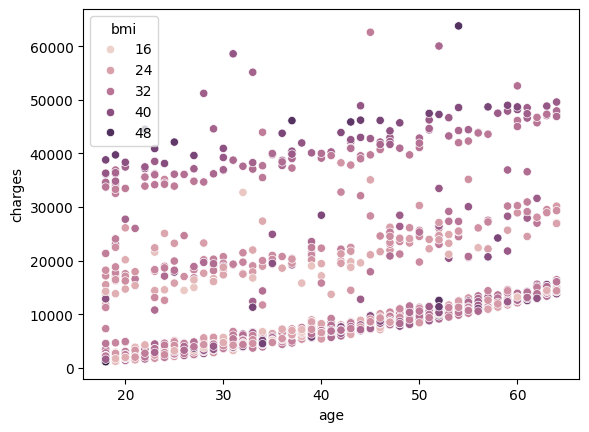

In [6]:
sns.scatterplot(x='age',y='charges',data=df,hue='bmi')

<Axes: >

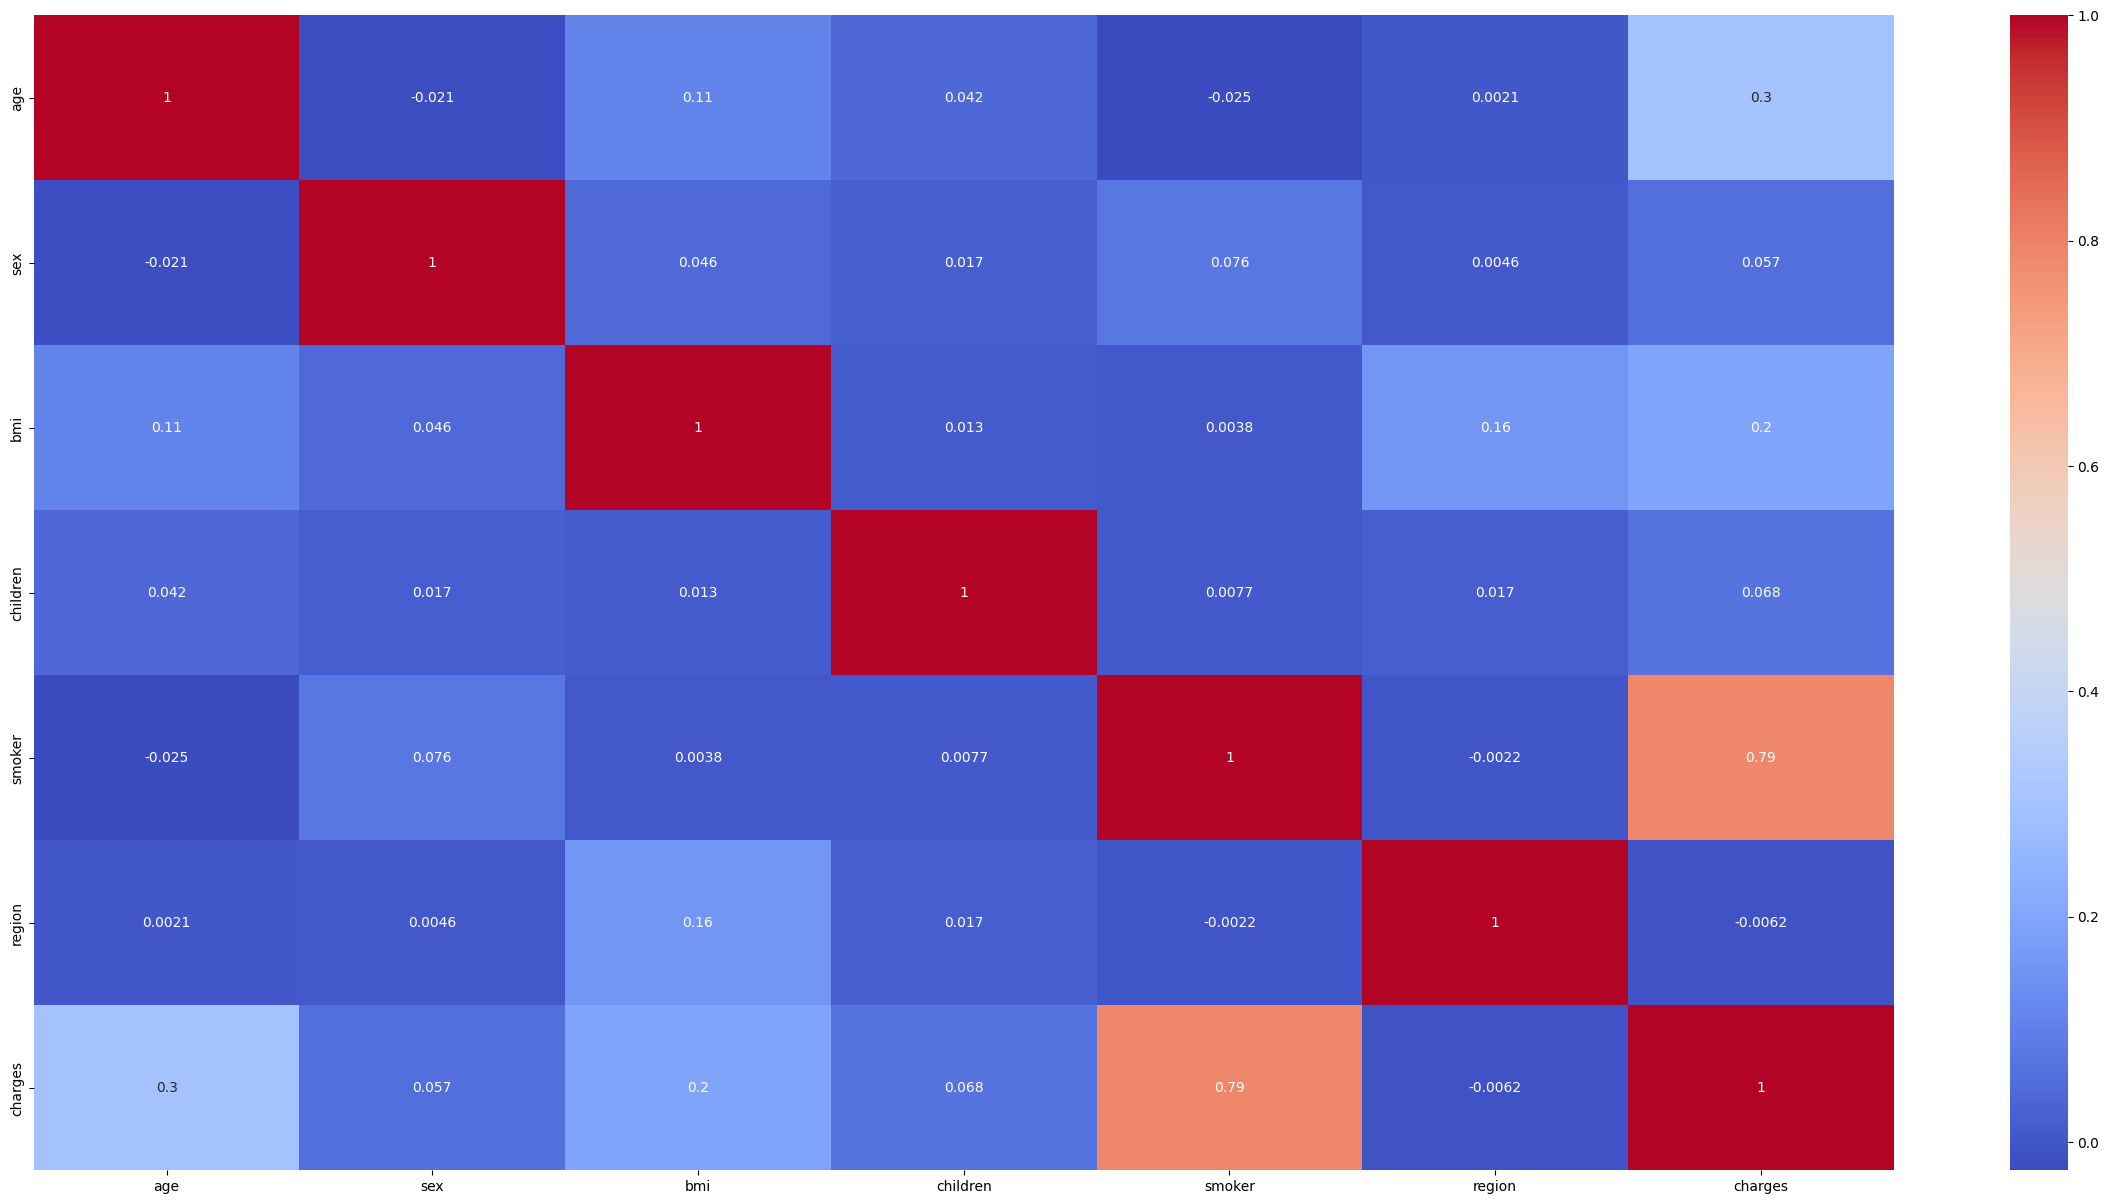

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [18]:
# Drop columns with low correlation with bmi

df.drop(['sex', 'smoker', 'children'], axis=1, inplace=True)

In [29]:
# Split the data

from sklearn.model_selection import train_test_split

# x is our independent variable (feature)
x=df.drop(['bmi'], axis=1)

# y is our dependent variable (label)
y= df['bmi']

# Split in 60:40
# Train Set ===> x_train, y_train
# Test Set ===> x_test, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [30]:
df.shape

(1338, 4)

In [31]:
x_train.shape

(802, 3)

In [32]:
0.6*1338

802.8

## With Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Fit on Train
scaler.fit(x_train)

# Transform on Train and Test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
x_train_scaled

array([[0.60869565, 0.33333333, 0.32810669],
       [0.80434783, 1.        , 0.17174353],
       [0.84782609, 0.33333333, 0.17276151],
       ...,
       [0.52173913, 0.        , 0.10403342],
       [0.86956522, 0.        , 0.18051621],
       [0.54347826, 1.        , 0.10087427]])

In [37]:
linreg = LinearRegression()

In [39]:
linreg = LinearRegression()

linreg.fit(x_train_scaled, y_train)

LinearRegression()

In [40]:
linreg.score(x_train_scaled, y_train)

0.054079938089142576

In [41]:
linreg.score(x_test_scaled, y_test)

0.06883313661147261

## Without Scaling

In [42]:
linreg.fit(x_train, y_train)

LinearRegression()

In [43]:
# Evaluate model accuracy on test set
linreg.score(x_test, y_test)

0.0688331366114755

In [45]:
Unscaled = 0.0688331366114755
Scaled = 0.054079938089142576

Scaled < Unscaled

True